## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

## 미션 풀이 시작



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### [Review]

데이터셋에는 여러 가지 특성이 포함되어 있다. 각 특성의 유형을 파악한 후, 미션 단계에 따라 분석을 진행할것.

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [32]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.

### 데이터 타입 및 기본 구조 확인

In [33]:
# 데이터셋의 기본 정보 확인
df.info()

# 수치형 변수와 범주형 변수 목록 생성
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

### [Review]

데이터셋에는 세 가지 수치형 변수(SeniorCitizen, tenure, MonthlyCharges)와 여러 범주형 변수(17개)들이 포함되어 있다. TotalCharges는 수치형 변수로 보이지만, 현재는 객체 타입으로 되어 있어 변환할 필요가 있다. 이를 수치형으로 변환한 후, 미션을 수행을 진행하였다.

1. **전체 수치 변수 시각화 및 분석**: SeniorCitizen, tenure, MonthlyCharges 및 변환된 TotalCharges를 이탈 여부(Churn)와 비교하여 시각화하고 분석한다.
2. **주요 범주형 변수와 이탈 여부 비교**: 범주형 변수와 Churn 간의 관계를 시각화하고 분석한다.
3. **수치변수 간 관계 분석**: 수치변수들 간의 상관계수를 계산하고 시각화한다.

먼저 TotalCharges를 수치형으로 변환할것. 변환 과정에서 오류가 발생할 수 있는 값을 NaN으로 처리하고, 이후 해당 값들을 처리할 것.

In [34]:
# 데이터셋의 기본 정보 확인
df.info()

# 수치형 변수와 범주형 변수 목록 생성
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features, categorical_features

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

(['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges',
  'Churn'])

### 'TotalCharges'의 NaN 값 처리 및 제거

In [35]:
# TotalCharges를 수치형으로 변환
# 오류가 발생하는 경우 NaN으로 설정
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [36]:
# NaN 값이 있는 행 확인
nan_total_charges = df[df['TotalCharges'].isna()]

# NaN 값을 포함한 행의 수 확인
nan_count = nan_total_charges.shape[0]
print(f'TotalCharges의 결측치 개수: {nan_count}')

nan_total_charges

TotalCharges의 결측치 개수: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


In [37]:
nan_total_charges[['TotalCharges', 'tenure']]

,TotalCharges,tenure
customerID,,
4472-LVYGI,NaN,0
3115-CZMZD,NaN,0
5709-LVOEQ,NaN,0
4367-NUYAO,NaN,0
1371-DWPAZ,NaN,0
7644-OMVMY,NaN,0
3213-VVOLG,NaN,0
2520-SGTTA,NaN,0
2923-ARZLG,NaN,0


### [Review]

TotalCharges 필드에는 NaN 값이 11개 존재한다. 
이 값들은 모두 tenure가 0인 경우, 즉 고객이 서비스를 이용하지 않은 경우에 해당한다.
이러한 경우들을 어떻게 처리할지 결정해야 한다. 

1. 결측치에 해당하는 행들을 제거한다 -> 가장 간단한 방법
2. NaN 값을 0으로 대체한다.

회의 결과, 데이터의 품질과 모델의 정확도를 고려할 때, TotalCharges의 NaN값이 있는 행을 제거하는 것이 더 합리적인 접근 방법이라고 판단하였다.

이유:
1. 데이터 완전성: 
    - tenure가 0인 경우, 즉 서비스를 이용하지 않은 고객들의 데이터는 TotalCharges가 결정적으로 중요한 정보를 제공하지 않는다고 판단. 
    - 이런 경우 데이터셋에서 제외하는 것이 더 깔끔할 수 있어보임.
2. 모델의 정확도: 
    - NaN 값을 0으로 대체하는 것은 데이터에 잘못된 정보를 추가할 수 있으며, 이는 모델 학습에 부정적인 영향을 미칠 수 있음.
    
따라서 이 행들을 제거하고, 남은 데이터로 분석을 진행하겠다. 먼저 이 행들을 제거하고 나서, 수치형 변수를 이탈 여부(Churn)에 따라 시각화하고 분석하는 작업을 진행하였다.

In [38]:
# NaN 값을 포함하는 행 제거
df_cleaned = df.dropna()

# 제거 후 데이터의 기본 정보 확인
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

NaN 값을 포함하는 행을 제거한 후, 데이터셋에는 총 7032개의 행이 남아 있는 것을 확인 완료.

### 수치형 변수 시각화

데이터셋의 수치형 변수(SeniorCitizen, tenure, MonthlyCharges, TotalCharges)를 이탈 여부(Churn)와 비교하여 시각화하고 분석한다. 이를 위해 각 수치형 변수에 대한 분포도를 그리고, 이탈 여부별로 나누어 비교해 보겠다.

In [39]:
# 수치형 변수 리스트

numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

/var/folders/l6/bbj5flm543v2l8w0k4snwjmw0000gn/T/ipykernel_16942/30403279.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[df_cleaned['Churn'] == 'No'][column], label='No Churn', shade=True, ax=axs[i, j])
/var/folders/l6/bbj5flm543v2l8w0k4snwjmw0000gn/T/ipykernel_16942/30403279.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[df_cleaned['Churn'] == 'Yes'][column], label='Churn', shade=True, ax=axs[i, j])
/var/folders/l6/bbj5flm543v2l8w0k4snwjmw0000gn/T/ipykernel_16942/30403279.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[df_cleaned['Churn'] == 'No'][column], label='No Chur

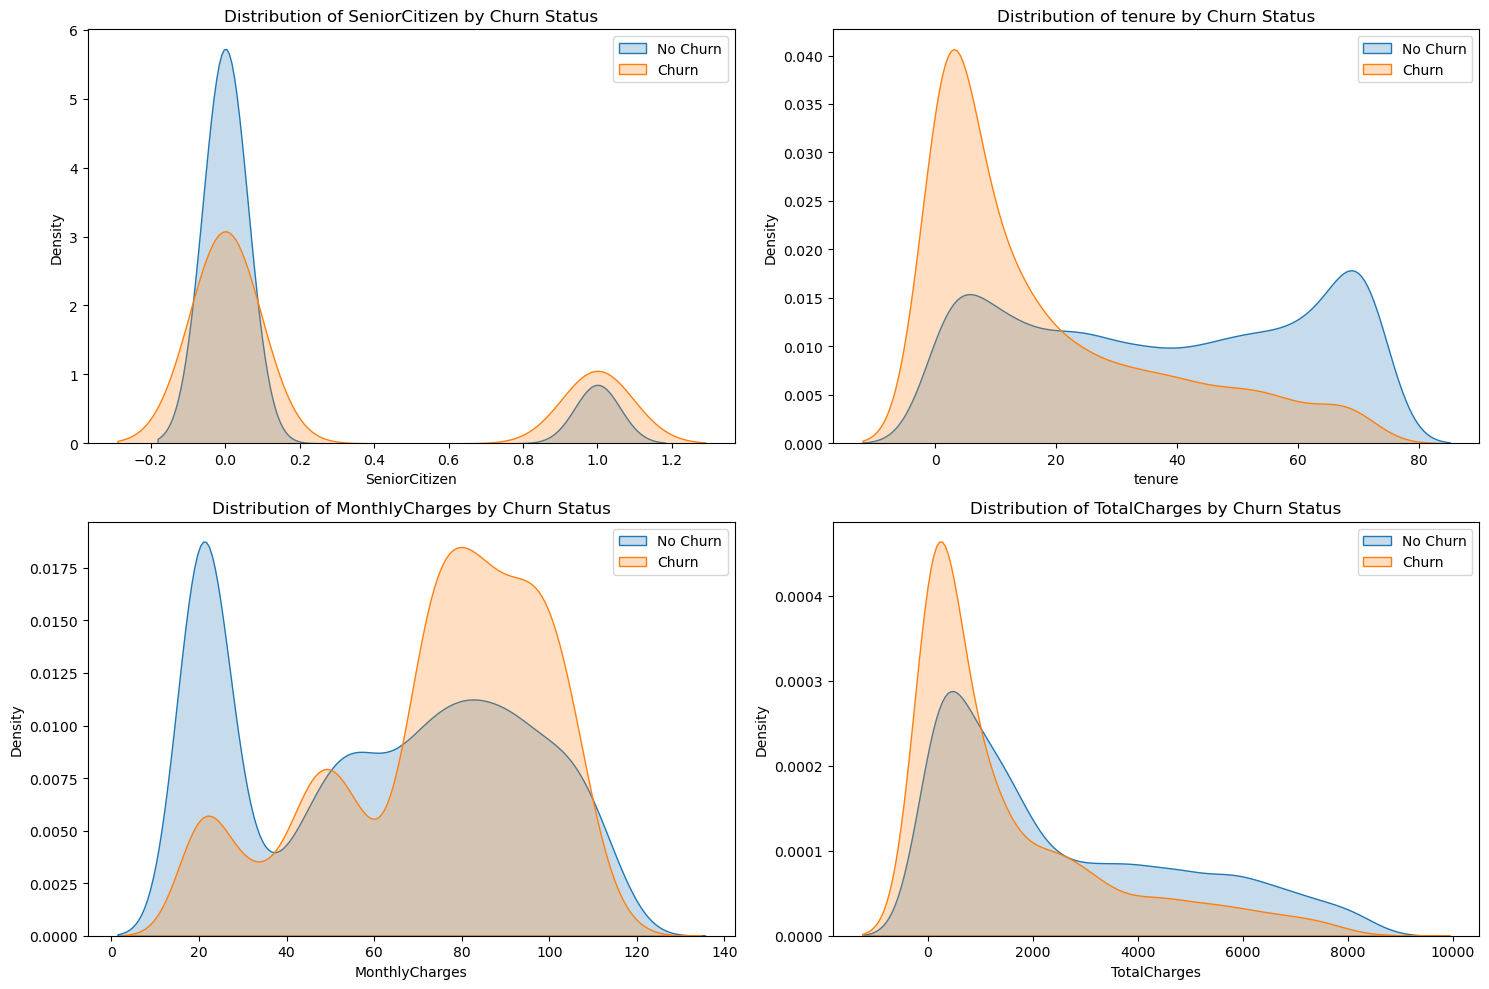

In [40]:
# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

idx = 0 # 서브플롯 인덱스 초기화

# 이탈 여부별로 각 수치형 변수의 분포 시각화
for i in range(2):
    for j in range(2):
        column = numerical_columns[idx]
        sns.kdeplot(df_cleaned[df_cleaned['Churn'] == 'No'][column], label='No Churn', shade=True, ax=axs[i, j])
        sns.kdeplot(df_cleaned[df_cleaned['Churn'] == 'Yes'][column], label='Churn', shade=True, ax=axs[i, j])
        axs[i, j].set_title(f'Distribution of {column} by Churn Status')
        axs[i, j].set_xlabel(column)
        axs[i, j].set_ylabel('Density')
        axs[i, j].legend()
        idx += 1

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

### [Review]

각 수치형 변수의 분포를 Churn별로 시각화하여 분석한 결과:
1. SeniorCitizen: 이탈한 고객 중 고령자의 비율이 비이탈 고객에 비해 높게 나타난다. 이는 고령자가 이탈할 가능성이 더 높을 수 있음을 시사한다.
2. tenure: 이탈 고객은 주로 낮은 tenure 값을 가지고 있으며, 오래된 고객일수록 이탈할 가능성이 낮아 보인다. 이는 고객 충성도와 이탈률 사이의 음의 상관관계를 나타낸다.
3. MonthlyCharges: 월간 요금이 높은 고객들 사이에서 더 높은 이탈률을 보여준다. 특히, 월간 요금이 낮은 고객들 중 이탈하는 경우는 상대적으로 적다.
4. TotalCharges: 이탈 고객과 비이탈 고객 간의 차이가 뚜렷하지 않으나, 전반적으로 낮은 TotalCharges 값을 가진 고객들이 이탈할 가능성이 더 높아 보인다.



## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [41]:
nunique = df_cleaned.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [42]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()
category_col_name

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

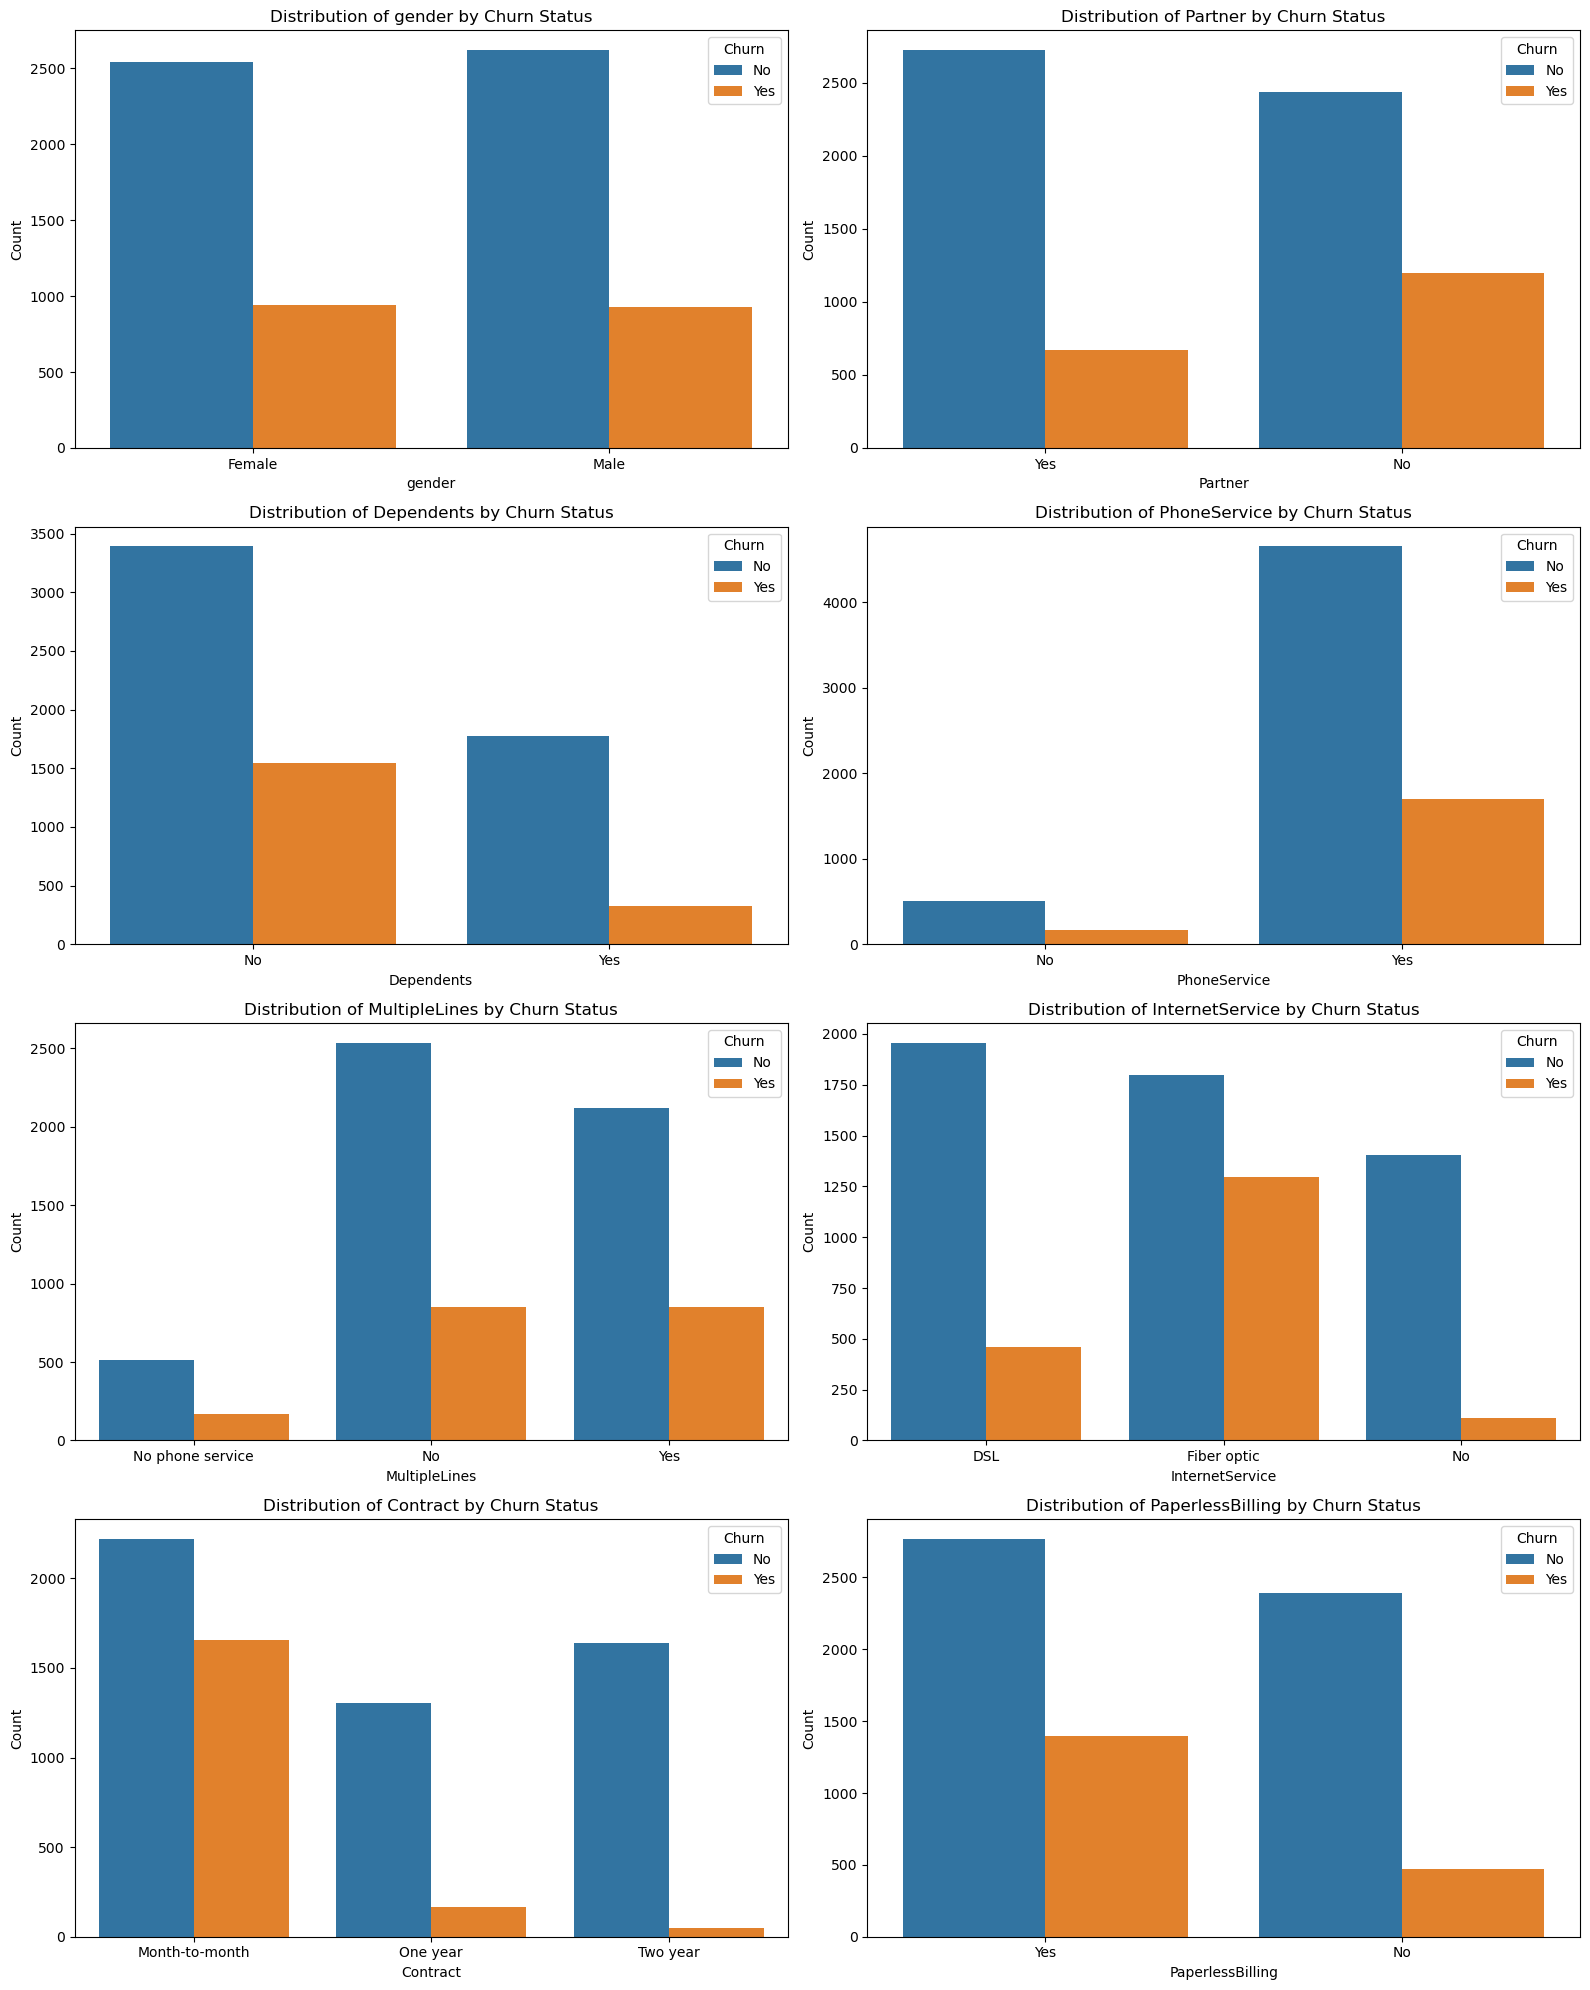

In [43]:
# # 주요 범주형 변수 리스트 (몇 가지 대표적인 변수만 선택)
selected_categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                                'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling']

# 4헹 2열의 서브플롯 생성
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

# 이탈 여부별로 각 범주형 변수의 분포 시각화
for i, column in enumerate(selected_categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(data=df_cleaned, x=column, hue='Churn', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {column} by Churn Status')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')
    axs[row, col].legend(title='Churn')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

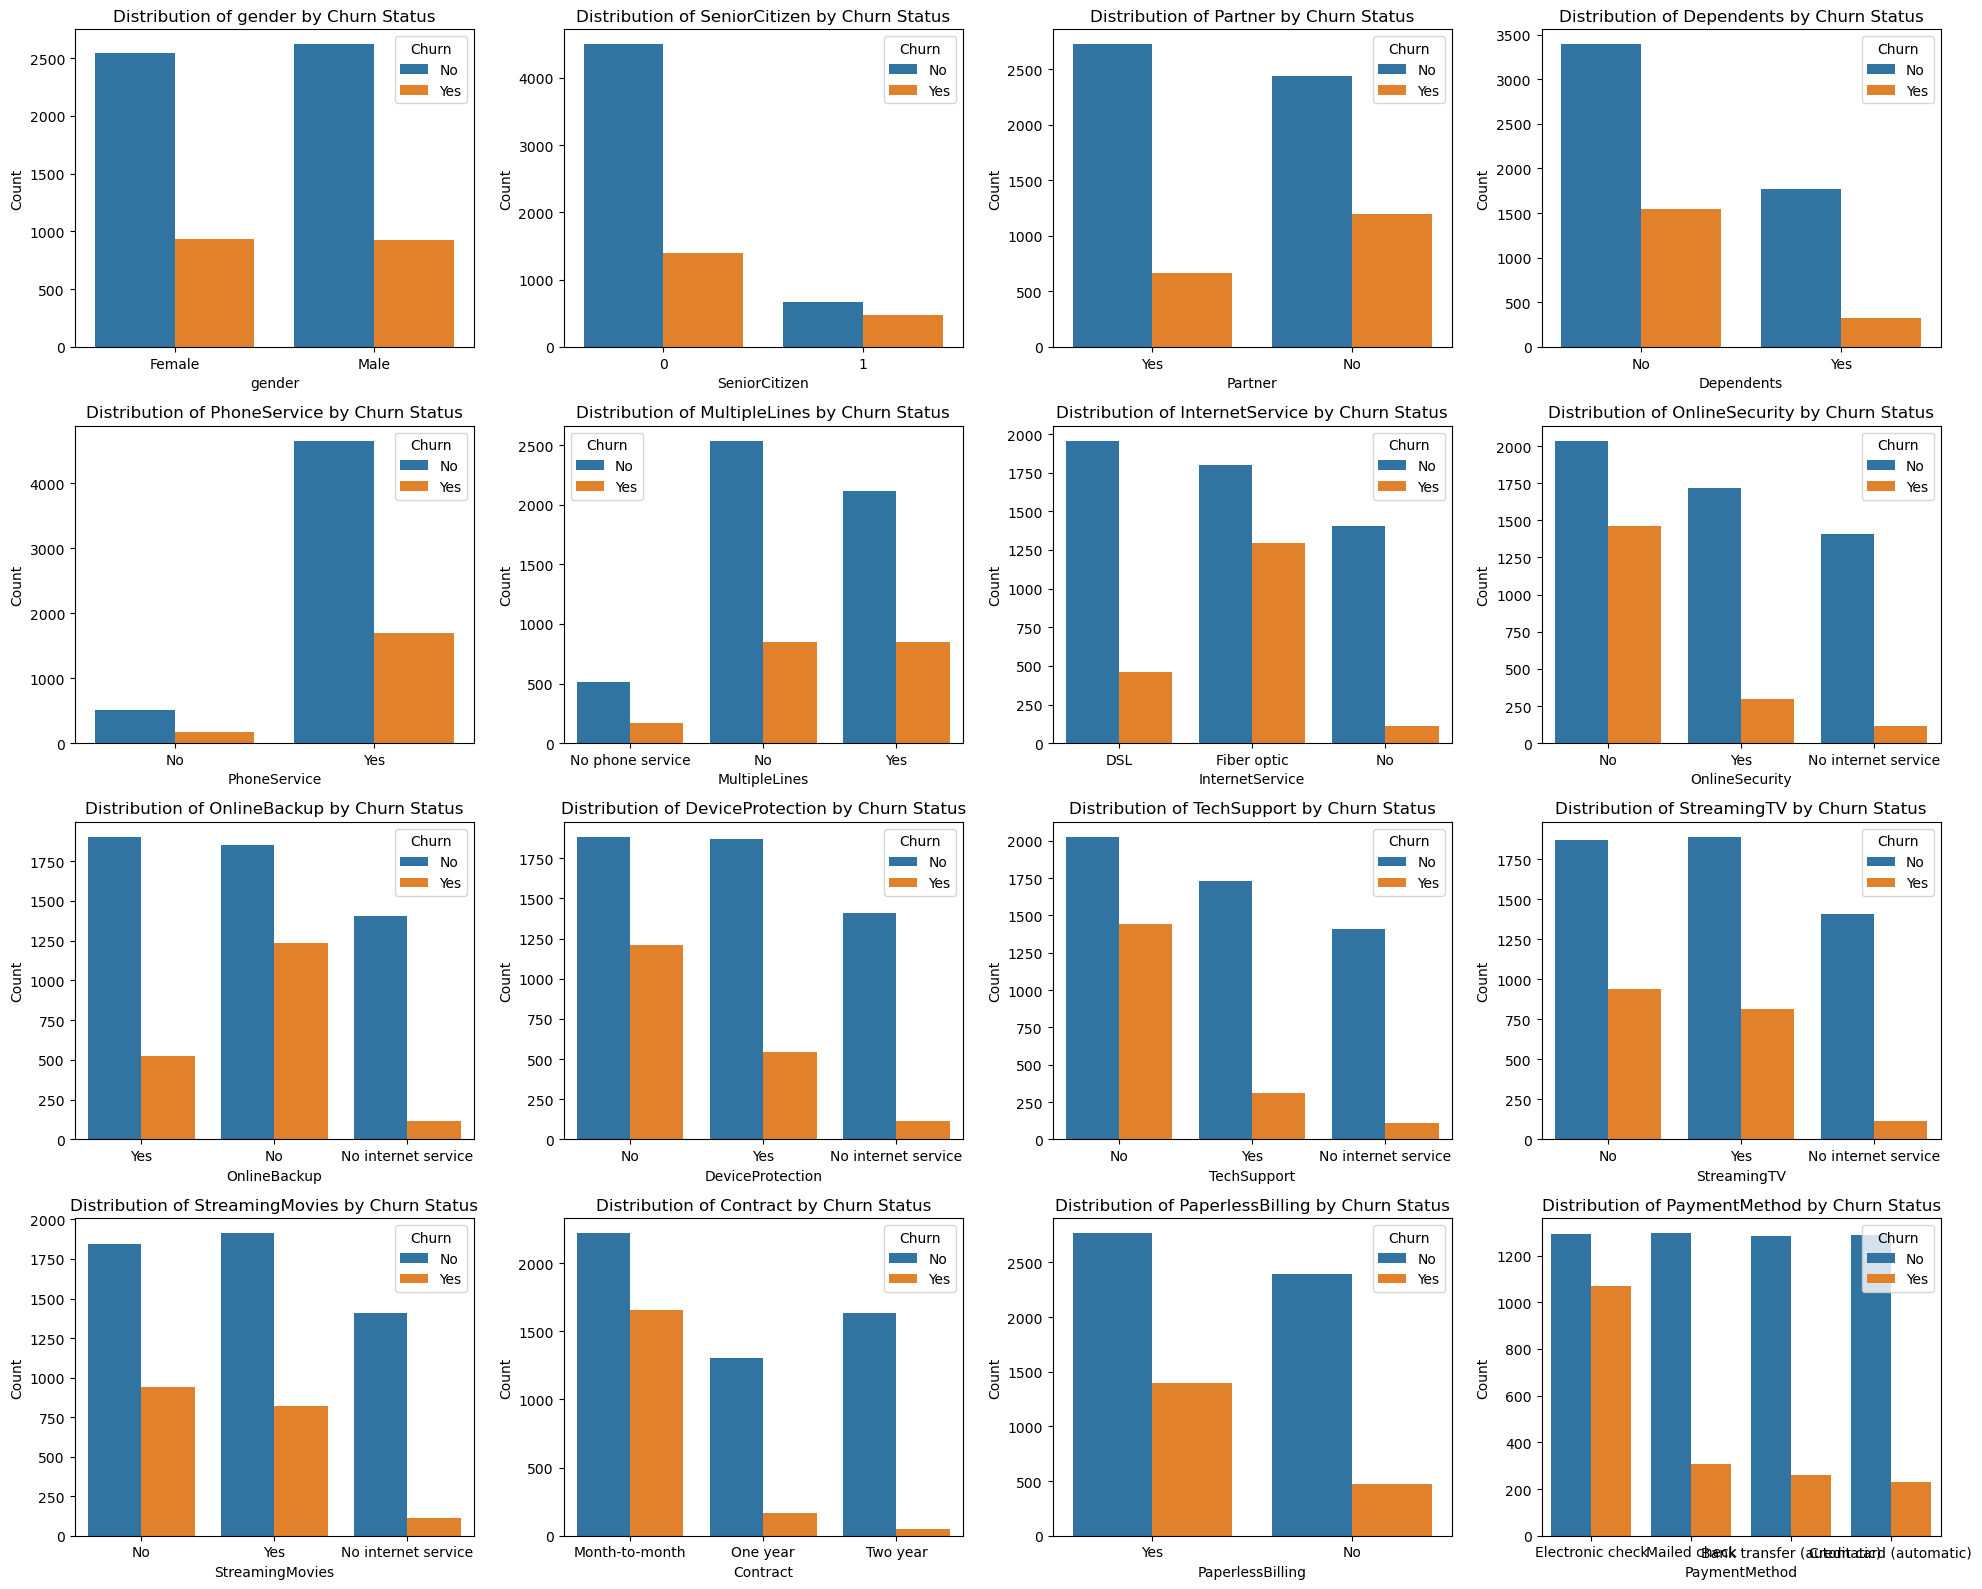

In [44]:
# 전체 범주형 변수 리스트
all_category_col_name = category_col_name[:-1]

# 4행 4열의 서브플롯 생성
fig, axs = plt.subplots(4, 4, figsize=(20, 16))

# 이탈 여부별로 각 범주형 변수의 분포 시각화
for i, column in enumerate(all_category_col_name):
    row = i // 4
    col = i % 4
    sns.countplot(data=df_cleaned, x=column, hue='Churn', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {column} by Churn Status')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')
    axs[row, col].legend(title='Churn')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

### [Review]

전화 서비스(PhoneService)의 경우, 단순히 이탈 여부(Churn)의 개수로만 데이터를 시각화하니 전화 서비스를 이용하는 고객과 그렇지 않은 고객 사이의 이탈률을 한눈에 비교하기 어렵다는 의견이 회의중에 나옴. 따라서 **정규화된 막대 그래프**를 통해 주요 범주형 변수둘에 대해 다시 시각화해 보았다.

추가) 표준화와 정규화의 차이
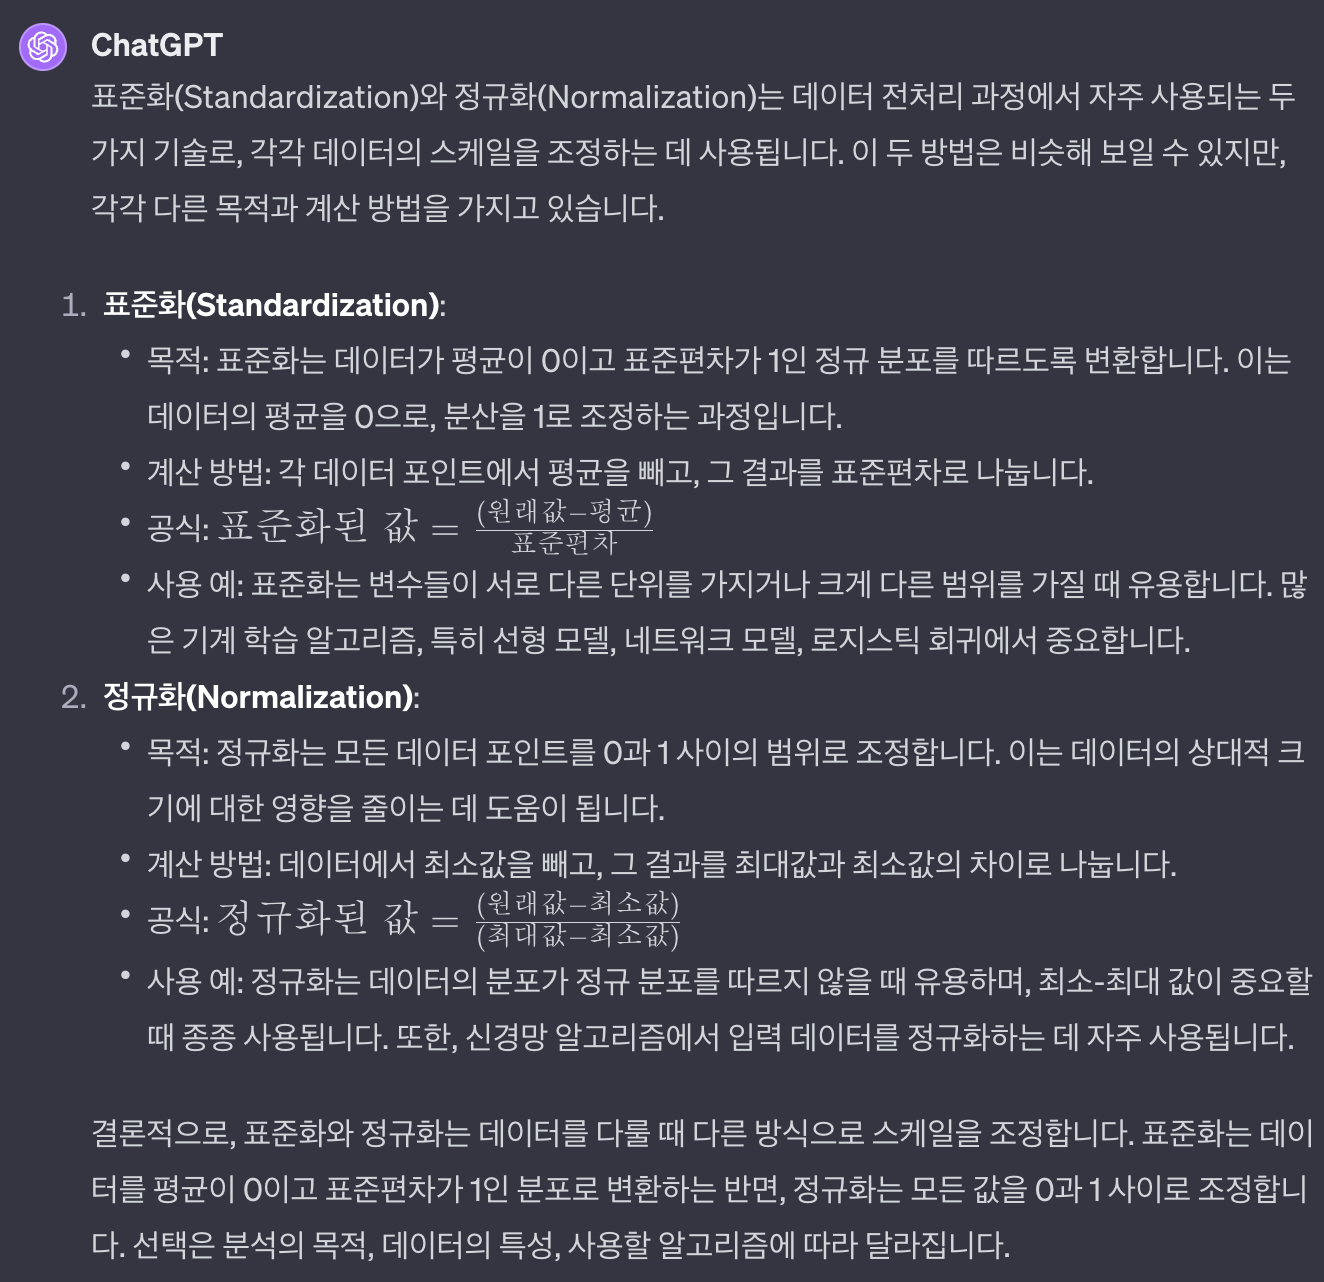

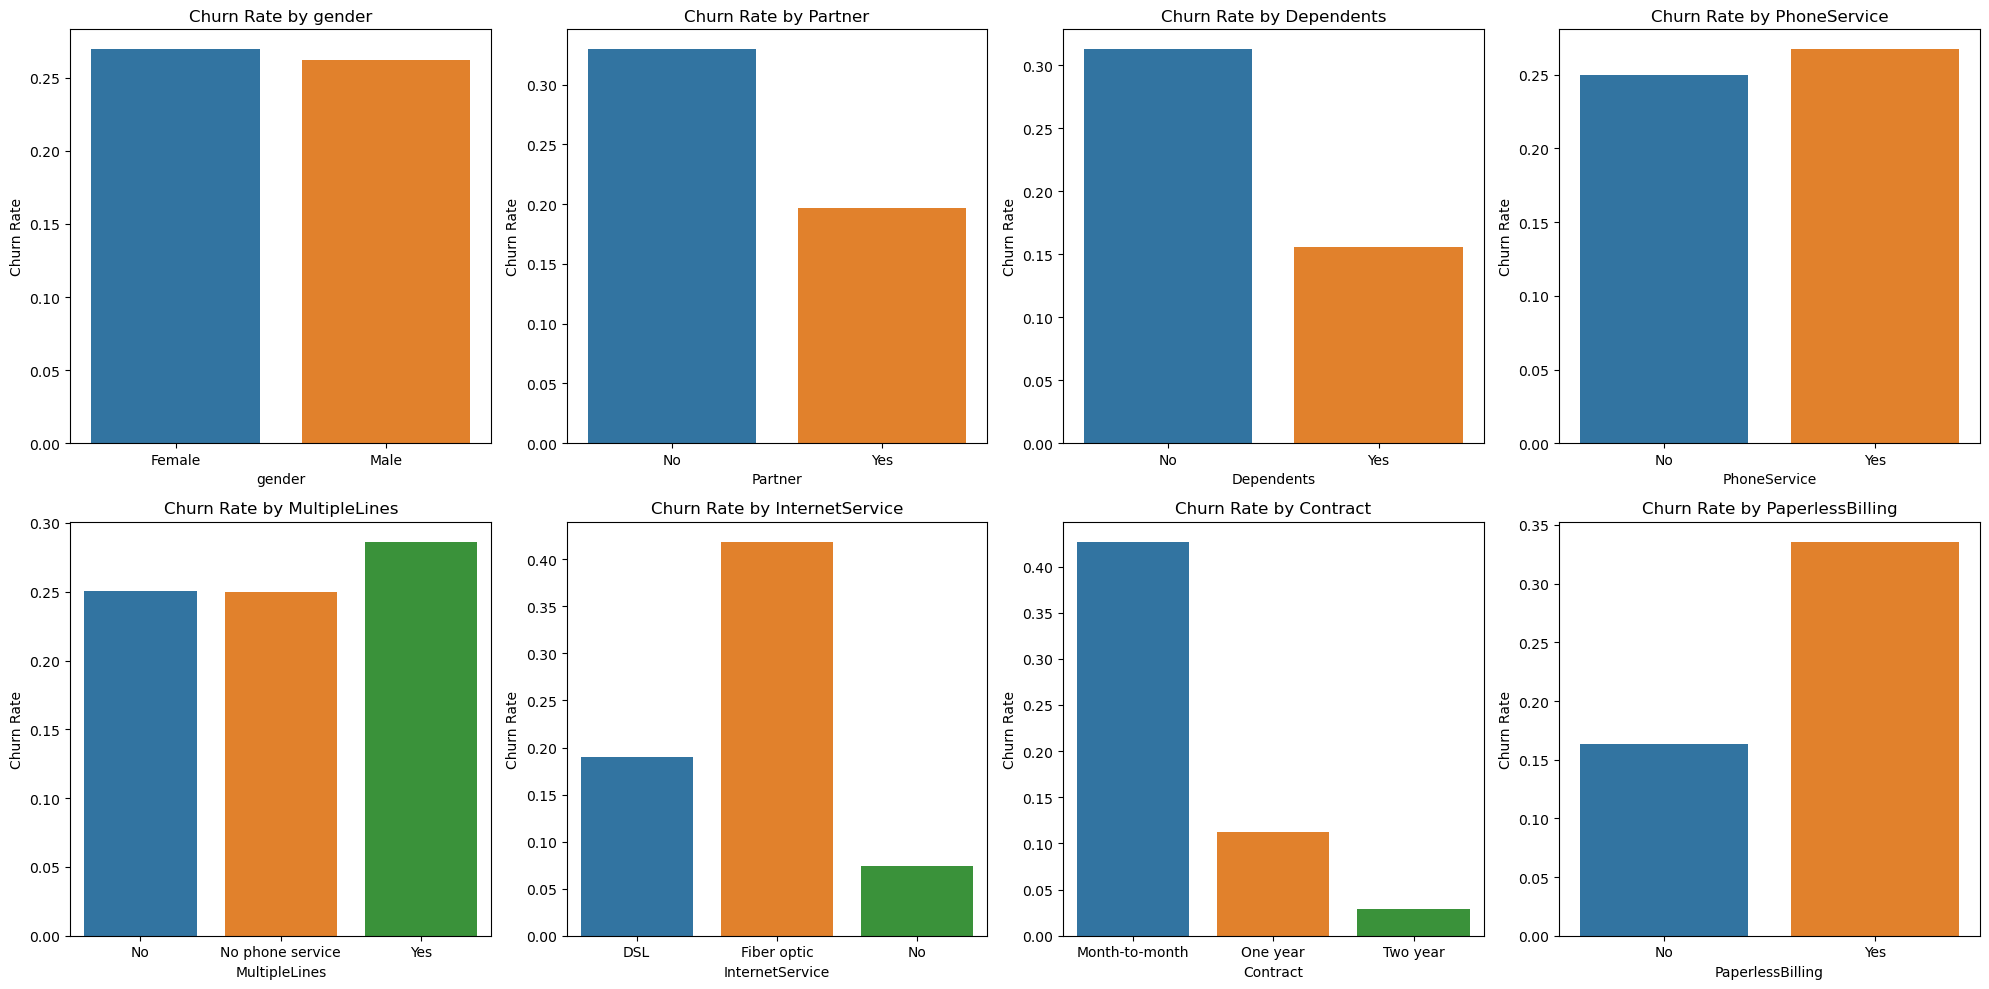

In [55]:
# 주요 범주형 변수 리스트
selected_categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                                'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling']

# 2행 4열의 서브플롯 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# 각 범주형 변수에 대한 그래프 생성
for i, column in enumerate(selected_categorical_columns):
    # 위치 조정을 위한 행과 열 인덱스 계산
    row = i // 4
    col = i % 4

    # 이탈률 계산
    churn_counts = df_cleaned.groupby(column)['Churn'].value_counts().unstack()
    churn_rates = churn_counts.div(churn_counts.sum(axis=1), axis=0)

    # 그래프 그리기
    sns.barplot(x=churn_rates.index, y=churn_rates[1], ax=axes[row, col]) # 1은 이탈을 나타냄
    axes[row, col].set_ylabel('Churn Rate')
    axes[row, col].set_title(f'Churn Rate by {column}')

plt.tight_layout() # 레이아웃 조정
plt.show()

### [Review]

주요 범주형 변수들에 대해 이탈 여부(Churn)별로 시각화한 결과를 분석해보면 다음과 같은 특징들을 발견할 수 있다.

1. 성별(gender): 이탈률은 성별에 크게 영향을 받지 않는 것으로 보인다.
2. 파트너(Partner): 파트너가 없는 고객들 사이에서 높은 이탈률을 보여준다.
3. 부양 가족(Dependents): 부양 가족이 없는 고객들이 더 높은 이탈률을 보인다.
4. 전화 서비스(PhoneService): 전화 서비스 이용 여부와 이탈률 사이에는 큰 차이가 없어 보인다.
5. 다중 회선(MultipleLines): 다중 회선 이용 고객과 이탈 여부 간의 뚜렷한 관계는 보이지 않는다.
6. 인터넷 서비스(InternetService): 광섬유(Fiber optic) 서비스 이용 고객들 사이에서 높은 이탈률을 보여준다.
7. 계약(Contract): 월간 계약 고객들이 다른 계약 유형에 비해 상대적으로 높은 이탈률을 보인다.
8. 종이 없는 청구(PaperlessBilling): 종이 없는 청구 서비스를 이용하는 고객들 사이에서 더 높은 이탈률을 보인다.

이러한 관찰을 바탕으로, 모델의 피처 선택 과정에서 고려해야 할 중요한 변수들을 파악할 수 있었다. 특히, 파트너 유무, 부양 가족 유무, 인터넷 서비스 종류, 계약 유형, 종이 없는 청구 여부 등이 중요한 피처로 보인다.

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

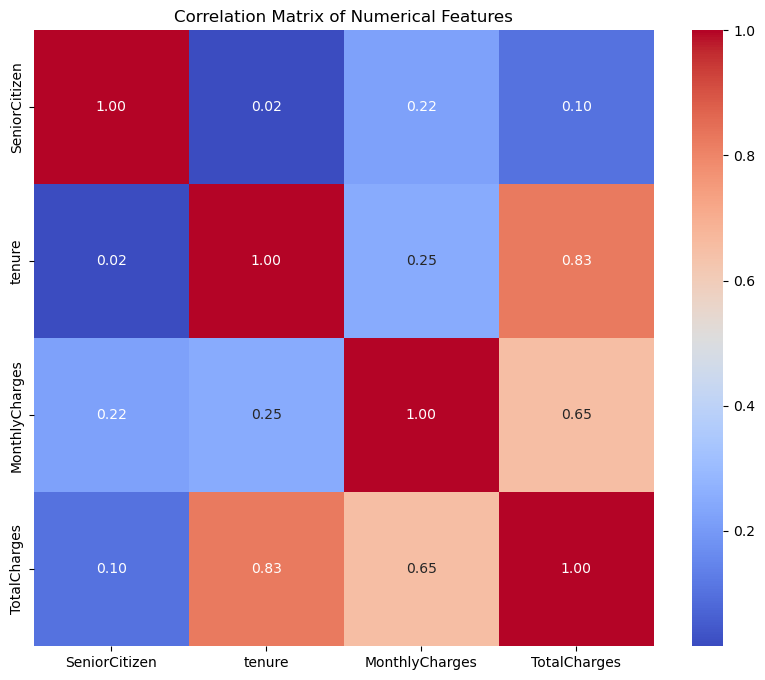

In [47]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.

# 수치형 변수들 간의 상관계수 계산
correlation_matrix = df_cleaned[numerical_columns].corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### [Review]

수치형 변수들 간의 상관계수 행렬을 시각화한 결과:

1. SeniorCitizen과 다른 변수들
    - SeniorCitizen은 다른 수치형 변수들과 상대적으로 낮은 상관관계를 보여준다.
    - 이는 고령자 여부가 다른 수치형 특성들과 독립적인 경향을 가질 수 있음을 시사한다.
2. tenure와 TotalCharges
    - 이들 변수 사이에는 0.83의 높은 양의 상관관계가 있다. 
    - 이는 서비스 이용 기간이 길수록 총 요금이 높아진다는 것을 나타내며, 예상되는 결과값이다.
3. MonthlyCharges와 TotalCharges
    - 이들 사이에도 0.65의 상당히 높은 상관관계가 있음. 
    - 이는 월간 요금이 높은 고객이 전체적으로 더 많은 요금을 지불한다는 것을 의미한다.
4. MonthlyCharges와 tenure
    - 이들 사이의 상관관계는 0.25로, 중간 정도의 양의 상관관계를 보여준다. 
    - 이는 오랫동안 서비스를 이용하는 고객들이 약간 더 높은 월간 요금을 지불할 가능성이 있다는 것을 의미할 수 있다.
    
tenure와 TotalCharges 간의 높은 상관관계는 주의해야 할 점으로, 이들 변수를 모두 사용할 때 "다중공선성 문제"가 발생할 수 있다. 이러한 상황을 고려하여 모델을 설계할 때 주의가 필요해 보인다.

- 다중공선성(多重共線性) 문제(Multicollinearity): 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제

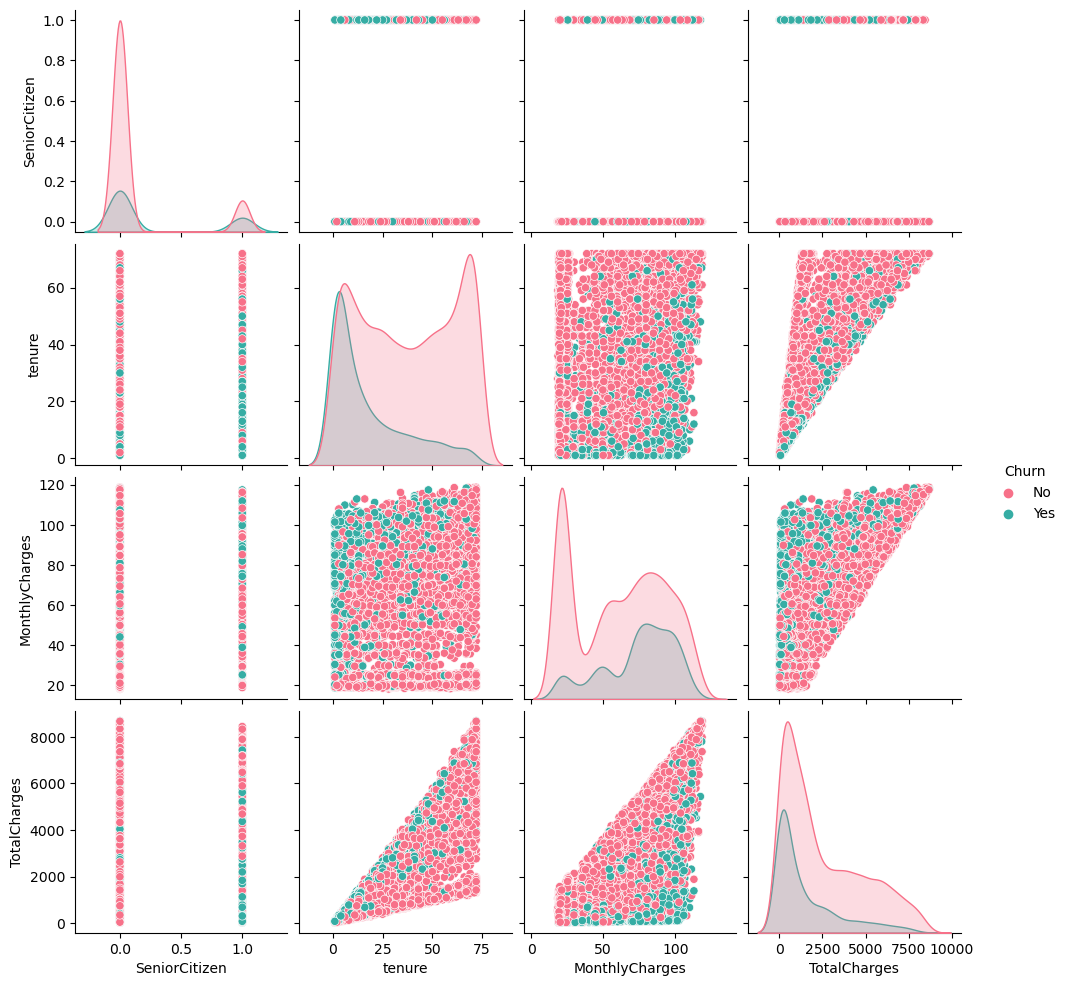

In [32]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.

sns.pairplot(df_cleaned, hue='Churn', vars=numerical_columns, palette='husl')
plt.show()

### [Review]

Seaborn의 pairplot을 사용하여 수치형 변수들 간의 관계를 이탈 여부(Churn)에 따라 시각화한 결과이다. 이 그래프는 다음과 같은 인사이트를 제공한다.

- 각 수치형 변수(SeniorCitizen, tenure, MonthlyCharges, TotalCharges)의 분포가 이탈 여부에 따라 어떻게 다른지를 보여준다.
- 변수 간 산점도를 통해 변수들 사이의 관계를 파악할 수 있다. 예를 들어, tenure와 TotalCharges 간에는 양의 상관관계가 보이며, 이탈한 고객과 비이탈 고객 간의 차이를 확인할 수 있다.
- 이탈 여부에 따라 색상이 다르게 표시되어, 각 변수가 고객 이탈에 어떤 영향을 미치는지 시각적으로 이해하기 쉽다.

### 추가 시각화: Boxplot 및 범주형 변수 교차분석

추가적으로 시도할 만한 시각화 방법 중 어떤 것이 적합할 지 회의 결과, boxplot과 범주형 변수 교차분석으로 나왔다.
- boxplot
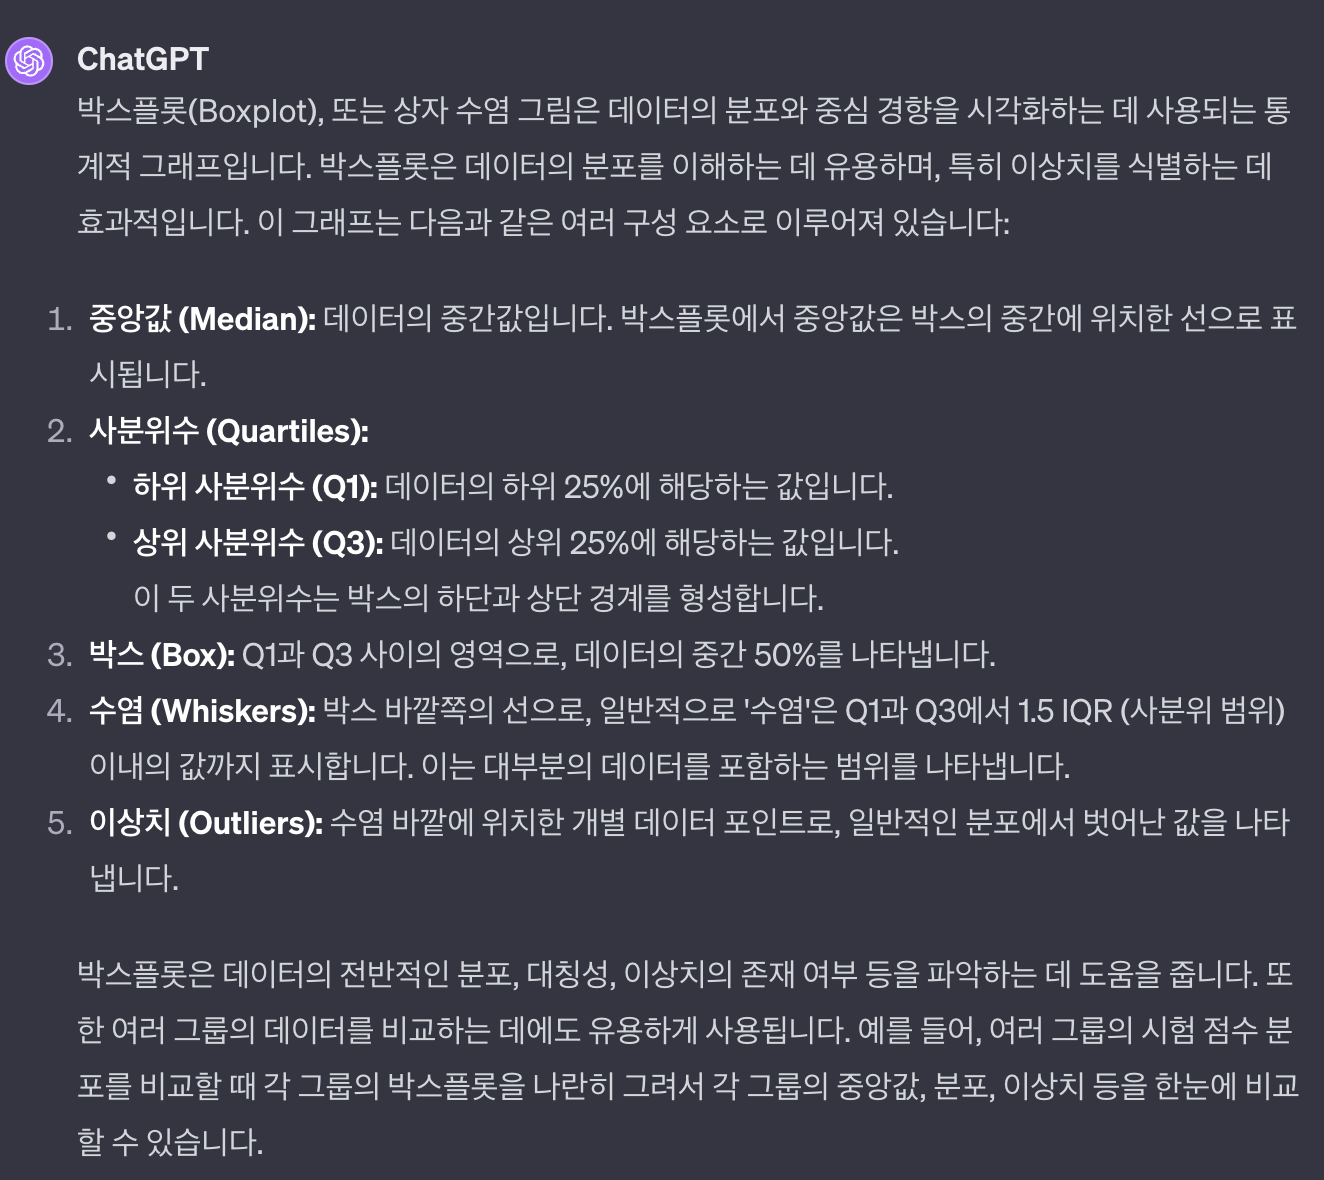

<br>
<br>

- 범주형 변수 교차분석
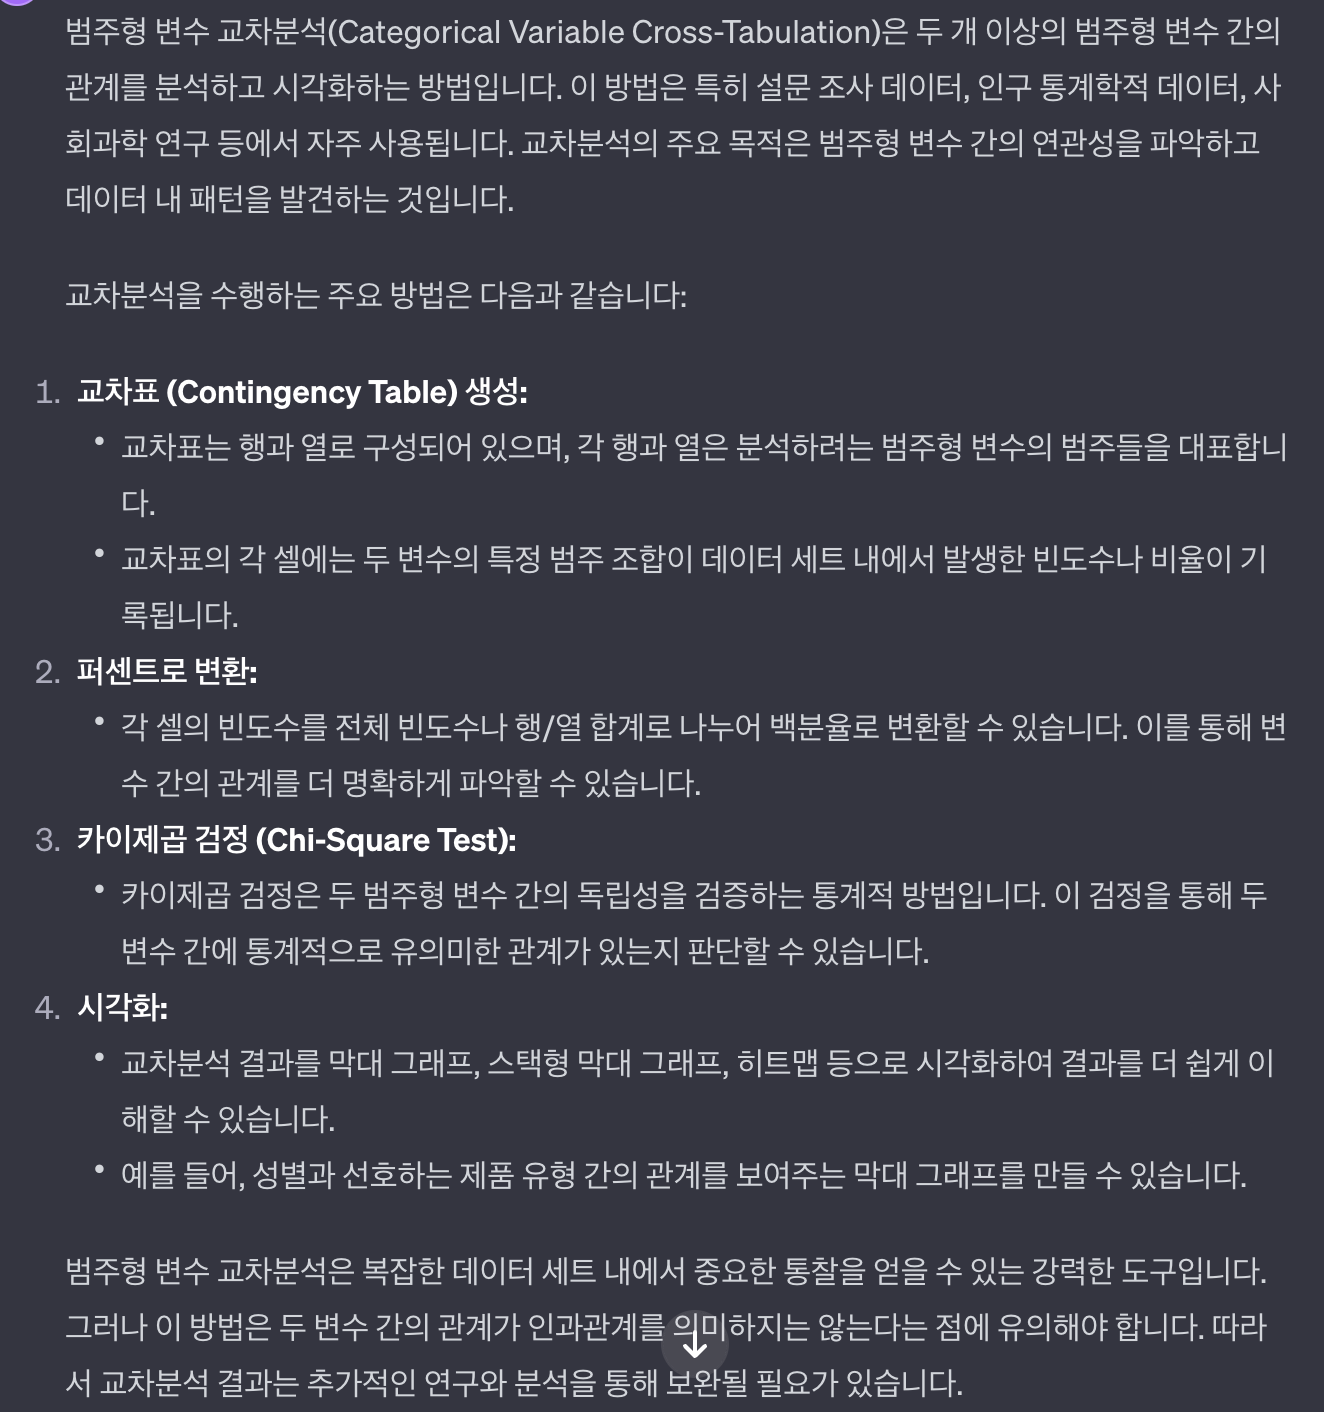

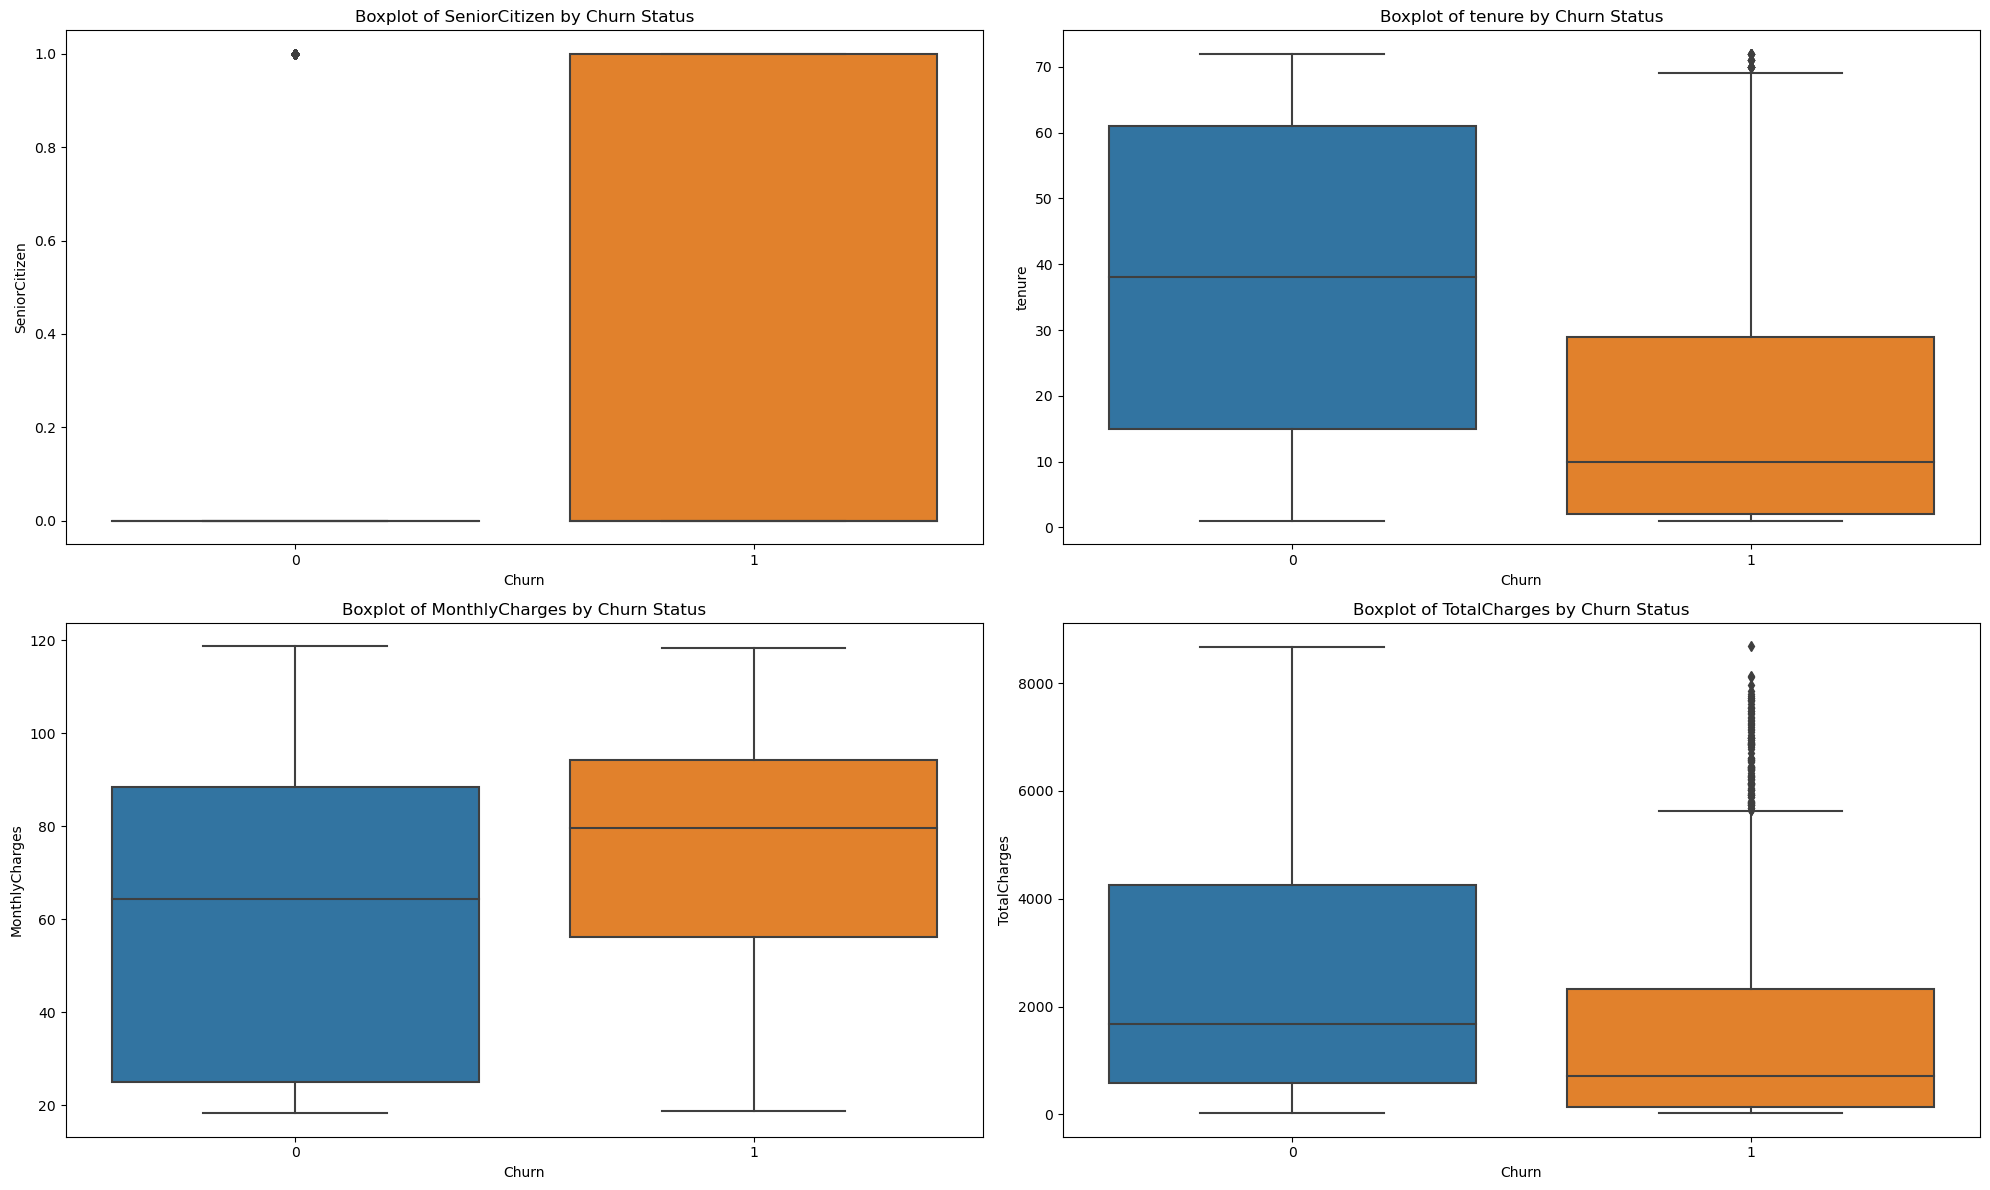

In [66]:
# 수치형 데이터에 대한 Boxplot 시각화

plt.figure(figsize=(20, 12))

# 각 수치형 변수에 대한 Boxplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_cleaned, x='Churn', y=column)
    plt.title(f'Boxplot of {column} by Churn Status')

plt.tight_layout()
plt.show()

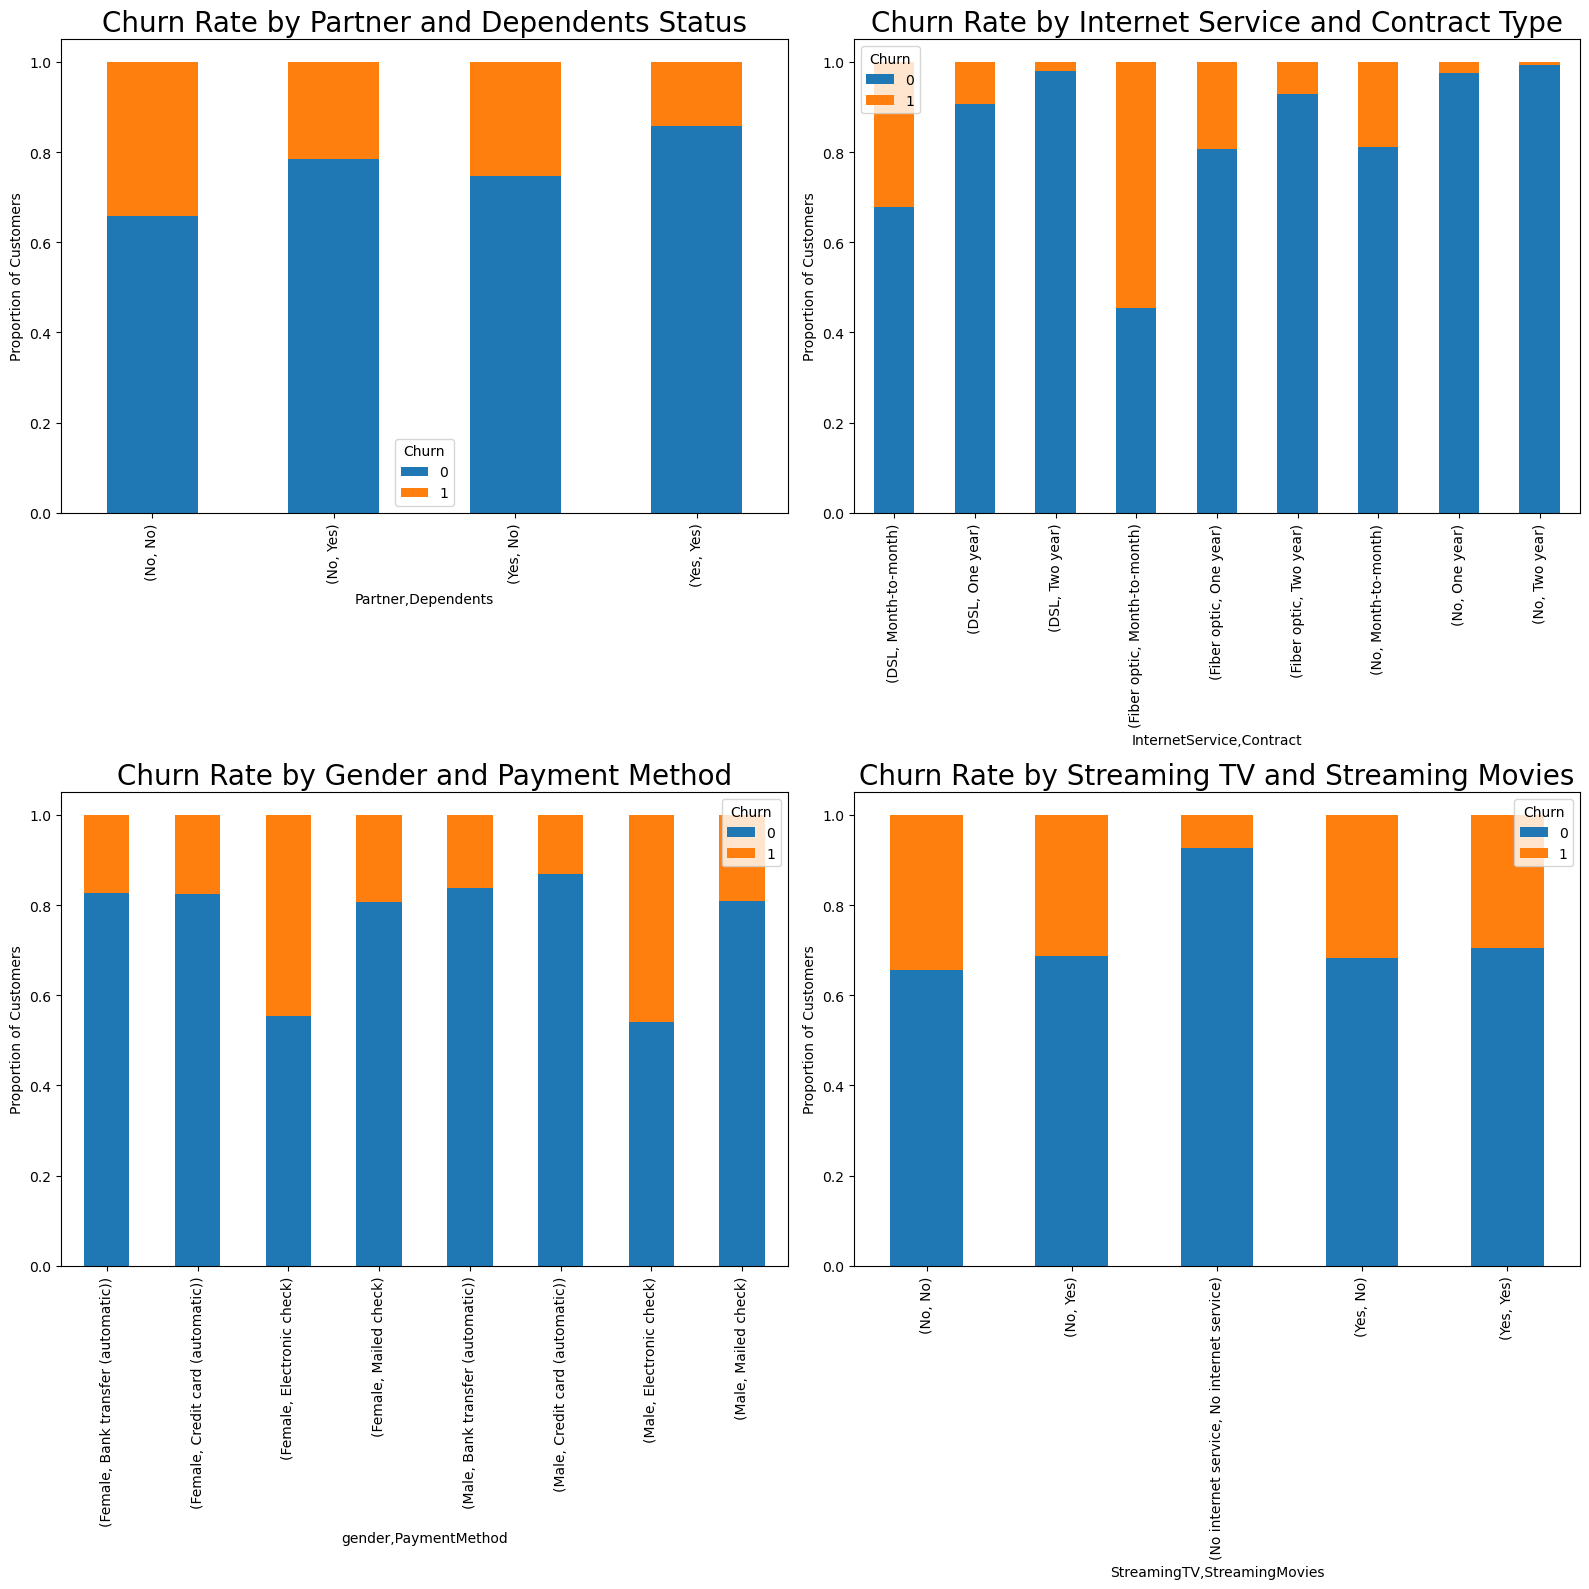

In [79]:
# 범주형 변수의 교차분석

# 교차분석 및 시각화를 위한 함수: 코드의 중복되는 내용이 많다는 피드백을 수용하여 함수로 수정함
def plot_cross_tab(df, index_cols, title, ax):
    cross_tab = pd.crosstab(index=[df[col] for col in index_cols], 
                            columns=df['Churn'], 
                            normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Proportion of Customers')
    
# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# 각 서브플롯에 교차분석 결과 시각화
plot_cross_tab(df_cleaned, ['Partner', 'Dependents'], 'Churn Rate by Partner and Dependents Status', axs[0, 0])
plot_cross_tab(df_cleaned, ['InternetService', 'Contract'], 'Churn Rate by Internet Service and Contract Type', axs[0, 1])
plot_cross_tab(df_cleaned, ['gender', 'PaymentMethod'], 'Churn Rate by Gender and Payment Method', axs[1, 0])
plot_cross_tab(df_cleaned, ['StreamingTV', 'StreamingMovies'], 'Churn Rate by Streaming TV and Streaming Movies', axs[1, 1])

plt.tight_layout()
plt.show()

### [Review]

1. 수치형 데이터에 대한 Boxplot 분석은 다음과 같은 인사이트는 다음과 같다.

- SeniorCitizen:
    - 이탈 여부에 따른 SeniorCitizen의 Boxplot은 이 변수가 이진적 특성(0 또는 1)을 가지고 있기 때문에, 두 그룹 간에 명확한 차이를 보이지 않는다.
    - 그러나 이탈한 고객들 사이에서 고령자(값이 1인 경우)의 비율이 더 높은 것을 간접적으로 확인할 수 있다. 이는 고령자 고객이 이탈할 가능성이 더 높음을 시사한다.
    
- Tenure:
    - 이탈한 고객(Churn: Yes)의 tenure 분포는 대체로 낮은 기간에 집중되어 있으며, 이는 신규 또는 단기 고객이 이탈할 가능성이 높음을 나타낸다.
    - 반면, 비이탈 고객(Churn: No)의 경우, tenure 분포가 더 넓고 높은 기간에도 분포하는 것을 볼 수 있으며, 이는 장기 고객의 충성도가 높음을 의미한다.
    
- MonthlyCharges:
    - 이탈한 고객들의 월간 요금(MonthlyCharges)은 더 높은 중앙값과 분포를 보인다. 이는 높은 월간 요금이 고객의 이탈에 영향을 줄 수 있음을 시사한다.
    - 비이탈 고객의 월간 요금 분포는 상대적으로 낮고 좁은 범위에 있으며, 이는 낮은 요금이 고객 유지에 도움이 될 수 있음을 나타낸다.

- TotalCharges:
    - TotalCharges의 Boxplot은 이탈한 고객과 비이탈 고객 간에 명확한 차이를 보이지 않는다. 이는 고객의 총 요금이 이탈 여부와 직접적인 상관관계가 없음을 나타내며, 다른 요인들이 더 중요할 수 있음을 의미한다.
    
이러한 분석은 고객 이탈에 영향을 미치는 다양한 요인들을 이해하는 데 도움이 되었다. 특히, tenure와 MonthlyCharges는 고객 이탈에 중요한 영향을 미치는 것으로 보이며, 이를 기반으로 한 모델 설계와 전략 수립에 중점을 두는 것이 좋을 것 같아 보인다.

<br>

2. 범주형 변수에 대한 교차분석을 통해 얻은 인사이트는 다음과 같다.

- 파트너(Partner)와 부양 가족(Dependents)에 따른 이탈률:
    - 파트너와 부양 가족이 없는 고객 그룹에서 이탈률이 가장 높게 나타난다. 이는 이들이 서비스에 대한 애착이 덜하거나 다른 요인으로 인해 쉽게 이탈할 수 있음을 시사한다.
    - 반대로, 파트너와 부양 가족이 모두 있는 고객 그룹에서는 상대적으로 이탈률이 낮다. 가족 단위의 고객이 더 안정적으로 서비스를 이용할 가능성이 높음을 나타낸다.
    - (회의 추가사항)가족 결합 서비스 등을 이용하는 고객일 경우, 그로 인해 비용의 혜택이 있을 수 있으므로, 혼자인 사람보다 더 오래 서비스를 유지하는 것 같다.
    
    <br>
- 인터넷 서비스(InternetService)와 계약(Contract) 타입에 따른 이탈률:
    - 광섬유 인터넷(Fiber optic) 서비스를 이용하는 고객 중에서, 특히 월간 계약(Month-to-month)을 선택한 고객 그룹에서 이탈률이 현저히 높다. 이는 고비용의 서비스와 유연한 계약 조건이 고객 이탈을 촉진할 수 있음을 시사한다.
    - DSL 인터넷 서비스를 이용하는 고객들 사이에서는 계약 유형에 따른 이탈률 차이가 덜 두드러진다. 이는 DSL이 광섬유에 비해 상대적으로 저렴하거나, 다른 요인으로 인해 고객 만족도가 높을 수 있음을 나타낸다.
    - 인터넷 서비스를 이용하지 않는 고객 그룹에서는 계약 유형과 상관없이 상대적으로 낮은 이탈률을 보인다. 이는 인터넷 서비스 자체가 특정 고객 그룹에게 중요한 이탈 요인이 될 수 있음을 시사한다.
    
    <br>
- 성별(Gender)과 결제 방법(PaymentMethod)에 따른 이탈률:
    - 성별에 관계없이, 전자 결제 방식(Electronic check)을 사용하는 고객 그룹에서 이탈률이 가장 높게 나타난다. 이는 전자 결제를 선호하는 고객들이 다른 결제 방법을 사용하는 고객들에 비해 더 변동성이 크거나 덜 만족하는 경향이 있음을 나타낼 수 있다.
    - 반면, 자동 이체(Bank transfer automatic)와 신용카드(Credit card automatic)를 사용하는 고객들의 이탈률은 상대적으로 낮다. 이는 이러한 결제 방법이 고객의 충성도와 관련이 있을 수 있음을 시사한다.
    - (회의 추가사항)자동 이체나 신용카드 자동 결제는 일반적으로 정기적이고 안정적인 결제 방식으로 간주된다. 반면, 전자 결제 방식은 종종 단발성이거나 수동적인 관리가 필요할 수 있으며, 이는 고객에게 불편함을 줄 수 있다. 불편한 결제 과정은 고객 만족도를 저하시키고, 이탈률을 증가시킬 수 있어 보인다.
    
    <br>
- 스트리밍 TV(StreamingTV)와 스트리밍 영화(StreamingMovies)에 따른 이탈률:
    - 스트리밍 서비스를 둘 다 이용하지 않는 고객 그룹에서 이탈률이 가장 낮다. 이는 스트리밍 서비스가 필수적인 서비스가 아니거나, 다른 서비스에 만족하는 고객들이 포함되어 있을 수 있음을 의미한다.
    - 스트리밍 TV와 스트리밍 영화를 둘 다 이용하는 고객 그룹에서 이탈률이 상대적으로 높게 나타난다. 이는 스트리밍 서비스의 품질, 가격, 또는 경쟁 서비스와의 비교에서 만족하지 못하는 고객이 포함될 가능성이 있어 보인다.
    - 스트리밍 서비스 중 하나만 이용하는 고객들의 이탈률도 높은 편이다. 이는 특정 스트리밍 서비스에 대한 만족도가 다른 서비스에 비해 낮을 수 있음을 시사한다.

### 데이터셋에 대한 총평

우리가 어떤 통신사의 데이터 분석가가 되었다고 생각하고, 주어진 데이터가 실제 통신사의 데이터라고 가정하여, 데이터셋에 대한 총평을 남겨보았다.

1. 데이터셋 구성: 
    - 이 데이터셋은 통신사 고객의 이탈(Churn)에 관한 정보를 포함하고 있으며, 고객의 개인적 특성(성별, 파트너 유무 등), 서비스 사용 관련 정보(인터넷 서비스 유형, 계약 유형 등), 그리고 과금 정보(월간 요금, 총 요금 등)를 포함한다. 
    - 전체적으로 다양한 특성을 포함하여 고객 이탈에 영향을 미치는 요인들을 잘 나타내고 있다.
    
    <br>
2. 주요 발견 사항
    - 수치형 변수 분석: tenure(서비스 사용 기간)가 길수록, 즉 고객 충성도가 높을수록 이탈률이 낮아지는 경향이 있었다. 반면, 월간 요금(MonthlyCharges)이 높은 고객들 사이에서 이탈률이 높게 나타났다.
    - 범주형 변수 분석: 파트너가 없고, 부양 가족이 없는 고객들이 높은 이탈률을 보였다. 광섬유 인터넷 서비스(Fiber optic)와 월간 계약 고객들의 이탈률이 높았으며, 종이 없는 청구 서비스를 이용하는 고객들도 더 높은 이탈률을 나타냈다.
    - 상관관계 분석: tenure와 TotalCharges는 높은 양의 상관관계를 보였으며, 이는 서비스 사용 기간이 길수록 총 요금이 증가한다는 것을 의미한다.
    
    <br>
3. 추가적으로 시도해 볼 만한 데이터 분석
    - 고객 행동 데이터, 예를 들어 서비스 사용 빈도, 고객 서비스 상호작용 빈도 등 추가적인 데이터를 포함하여 분석을 확장할 수 있어 보인다.
    - 클러스터링 방법을 사용하여 고객 세분화를 더 세밀하게 진행하고, 각 클러스터에 대한 맞춤형 전략을 개발하는 것도 좋아 보인다.
    
    <br>
4. EDA를 통해 알 수 있는 비즈니스 인사이트 및 전략 제안
    - 고객 충성도 강화: tenure가 긴 고객들의 낮은 이탈률을 고려할 때, 고객 충성도 프로그램을 강화하는 것이 중요하다. 장기 고객에게 혜택을 제공하거나, 개인화된 서비스를 제공하여 고객 만족도를 높일 수 있을 것으로 보인다.
    - 가격 정책 재검토: 월간 요금이 높은 고객의 높은 이탈률을 고려해, 가격 정책을 재검토할 필요가 있어 보인다. 특히, 광섬유 서비스 이용 고객의 이탈률이 높은 것을 고려할 때, 가격 경쟁력을 강화할 전략이 필요하다고 생각한다.
    - 특정 고객 세그먼트 집중: 파트너나 부양 가족이 없는 고객, 월간 계약 고객, 종이 없는 청구 서비스 이용 고객 등 특정 세그먼트에 집중하여 마케팅 전략을 개발하는 것이 유리할 수 있다.
    - 결제 관련 마케팅 전략: 다양한 결제 방법을 제공하고, 특히 전자 결제를 선호하는 고객에게 추가적인 혜택을 제공하여 만족도를 높일 필요가 있어 보인다.